In [2]:
import pandas as pd
import numpy as np
from tkinter import Tk
import os
import datetime
import xlsxwriter

In [3]:
opp = 30*10

In [4]:
def read_excelfiles(extension):
    # Ask for directory
    # from tkinter.filedialog import askdirectory
    # path_files = askdirectory(title='Selecteer de map met alle ruwe input') # shows dialog box and return the path
    file_path = r"C:\Users\hnx\Desktop\Alblasserdam\Nieuwe invoer"
    list_files = []

    for filename in os.listdir(file_path):
        if filename.endswith(extension):
            list_files.append(os.path.join(file_path, filename))
        else:
            continue

    return list_files

In [5]:
list_files = read_excelfiles(extension='csv')
print(list_files)

['C:\\Users\\hnx\\Desktop\\Alblasserdam\\Nieuwe invoer\\jan.csv', 'C:\\Users\\hnx\\Desktop\\Alblasserdam\\Nieuwe invoer\\juni_deel1.csv', 'C:\\Users\\hnx\\Desktop\\Alblasserdam\\Nieuwe invoer\\juni_deel2.csv', 'C:\\Users\\hnx\\Desktop\\Alblasserdam\\Nieuwe invoer\\juni_deel3.csv', 'C:\\Users\\hnx\\Desktop\\Alblasserdam\\Nieuwe invoer\\nov_deel1.csv', 'C:\\Users\\hnx\\Desktop\\Alblasserdam\\Nieuwe invoer\\nov_deel2.csv', 'C:\\Users\\hnx\\Desktop\\Alblasserdam\\Nieuwe invoer\\nov_deel3.csv']


In [ ]:
# read csv files

f = lambda x: (x.replace(",",".")) 
df1 = pd.read_csv(list_files[0], sep=';', decimal=',',converters = {'ZAD_FBIF1.MW	':f, "ZAD_FBIF1.TRTO":f})
df1["DateTime"] = pd.to_datetime(df1["DateTime"], format='%d-%m-%Y %H:%M:%S')
df1.set_index("DateTime",drop=True, inplace=True)
df1.head()

In [ ]:
f = lambda x: (x.replace(",",".")) 
df2 = pd.read_csv(list_files[1], sep=";",converters = {'ZAD_ABEF1.MW':f, "ZAD_LTAK1.MW":f, "ZAD_DTAK2.MW":f, "ZAD_ABL34.SB":f}, decimal=',')

In [ ]:
df2["DateTime"] = pd.to_datetime(df2["DateTime"], format='%d-%m-%Y %H:%M:%S')
df2.set_index("DateTime",drop=True, inplace=True)
df2.head()

In [ ]:
df1["Tijd"] = df1.index
df1 = df1.drop_duplicates(subset='Tijd', keep="first")
df1_nan = df1
df1_nan[df1_nan["ZAD_FBIF1.MW"]=='(null)'] = np.nan
df1_nan[df1_nan["ZAD_FBIF1.TRTO"]=='(null)'] = np.nan
df1_nan[["ZAD_FBIF1.MW","ZAD_FBIF1.TRTO"]] = df1_nan[["ZAD_FBIF1.MW","ZAD_FBIF1.TRTO"]].astype(float)

In [ ]:
df2["Tijd"] = df2.index
df2 = df2.drop_duplicates(subset='Tijd', keep="first")
df2_nan = df2[["ZAD_LTAK1.MW","ZAD_DTAK2.MW","ZAD_ABL34.SB"]]
df2_nan["ZAD_LTAK1.MW"][df2_nan["ZAD_LTAK1.MW"]=="(null)"] = np.nan
df2_nan["ZAD_DTAK2.MW"][df2_nan["ZAD_DTAK2.MW"]=="(null)"] = np.nan
df2_nan["ZAD_ABL34.SB"][df2_nan["ZAD_ABL34.SB"]=="(null)"] = np.nan


In [ ]:
df = pd.merge(df1_nan[["ZAD_FBIF1.MW","ZAD_FBIF1.TRTO"]], df2_nan, left_index=True, right_index=True)
df.head()

In [ ]:
df_minutes = df.apply(pd.to_numeric).resample('1Min')[["ZAD_FBIF1.MW","ZAD_FBIF1.TRTO","ZAD_LTAK1.MW","ZAD_DTAK2.MW"]].mean()
df_append = df.apply(pd.to_numeric).resample('1Min')["ZAD_ABL34.SB"].max()
df_minutes = pd.merge(df_minutes,df_append,left_index=True,right_index=True)
df_minutes.head()

In [ ]:
df_minutes.to_excel(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\WsRL 7 dec 2020\Minutendata_Ablasserdam.xlsx")

Alle data in één csvfile

In [21]:
flpth = r"C:\Users\hnx\Downloads\Alblasserdam nov deel1.csv"
f = lambda x: (x.replace(",",".")) 
dfa = pd.read_csv(flpth, sep=';', decimal=',',converters = {'ZAD_FBIF1.MW	':f, "ZAD_FBIF1.TRTO":f, 'ZAD_ABEF1.MW':f, "ZAD_LTAK1.MW":f, "ZAD_DTAK2.MW":f, "ZAD_ABL34.SB":f})
dfa["DateTime"] = pd.to_datetime(dfa["DateTime"], format='%d-%m-%Y %H:%M')
dfa.set_index("DateTime",drop=True, inplace=True)
dfa.head()

,ZAD_FBIF1.MW,ZAD_ABEF1.MW,ZAD_PSU02.TRTO,ZAD_HEF01.SB,ZAD_ZTAK2.MW,ZAD_MBL04.SB,ZAD_MBL03.SB,ZAD_ABL34.SB,ZAD_DTAK2.MW,ZAD_LTAK1.MW,...,ZAD_JBEF4.MW,ZAD_ABEF4.MW,ZAD_PSU05.TRTO,ZAD_HEF04.SB,ZAD_ZTAK5.MW,ZAD_MBL10.SB,ZAD_MBL09.SB,ZAD_ABL37.SB,ZAD_DTAK5.MW,ZAD_LTAK4.MW
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-11-01,378,(null),3456879,5121,0.02,1025,1025,1089,0.050000001,4.78000021,...,(null),(null),4053964,9217,1.16,1025,1025,1057,2.64,4.48
2020-11-01,380,(null),3456879,5121,0.02,1025,1025,1089,0.059999999,4.78000021,...,(null),(null),4053964,9217,1.16,1025,1025,1057,2.63,4.48
2020-11-01,378,(null),3456879,5121,0.02,1025,1025,1089,0.02,4.78000021,...,(null),(null),4053964,9217,1.16,1025,1025,1057,2.62,4.48
2020-11-01,379,(null),3456879,5121,0.02,1025,1025,1089,0.07,4.78000021,...,(null),(null),4053964,9217,1.16,1025,1025,1057,2.65,4.48
2020-11-01,381,(null),3456879,5121,0.02,1025,1025,1089,0,4.78000021,...,(null),(null),4053964,9217,1.16,1025,1025,1057,2.6,4.48


In [22]:
df_x = dfa[["ZAD_FBIF1.MW", "ZAD_LTAK1.MW","ZAD_DTAK2.MW","ZAD_ABL34.SB"]]

df_x[df_x["ZAD_FBIF1.MW"]=='(null)'] = np.nan
df_x["ZAD_FBIF1.MW"] = df_x["ZAD_FBIF1.MW"].astype(float)
df_x["ZAD_LTAK1.MW"][df_x["ZAD_LTAK1.MW"]=="(null)"] = np.nan
df_x["ZAD_DTAK2.MW"][df_x["ZAD_DTAK2.MW"]=="(null)"] = np.nan
df_x["ZAD_ABL34.SB"][df_x["ZAD_ABL34.SB"]=="(null)"] = np.nan

In [23]:
df_minutes = df_x.apply(pd.to_numeric).resample('1Min')[["ZAD_FBIF1.MW","ZAD_LTAK1.MW","ZAD_DTAK2.MW"]].mean()
df_append = df_x.apply(pd.to_numeric).resample('1Min')["ZAD_ABL34.SB"].max()
df_minutes = pd.merge(df_minutes,df_append,left_index=True,right_index=True)
df_minutes.head()

,ZAD_FBIF1.MW,ZAD_LTAK1.MW,ZAD_DTAK2.MW,ZAD_ABL34.SB
DateTime,,,,
2020-11-01 00:00:00,382.050000,4.776167,0.031500,1089.0
2020-11-01 00:01:00,512.483333,4.757000,0.050500,1089.0
2020-11-01 00:02:00,511.600000,4.723000,0.051667,1089.0
2020-11-01 00:03:00,267.333333,4.689667,0.040167,1089.0
2020-11-01 00:04:00,428.966667,4.654500,0.034833,1089.0


In [24]:
df_minutes.to_csv(r"C:\Users\hnx\Desktop\Alblasserdam\nov_deel1.csv", sep=";", decimal=",", )

Inlezen losse csv's met minutendata

In [6]:
dfs = [pd.read_csv(el, sep=';',index_col=[0], parse_dates=[0], decimal=',') for el in list_files]
df = pd.concat(dfs).sort_index()
df = df.max(level=0)

In [7]:
df_minutes = df

Hele jaar minuten data inlezen (foutieve luchtklepstand)

In [ ]:
f = lambda x: (x.replace(",",".")) 
df_groot = pd.read_csv(r"C:\Users\hnx\Desktop\Ablasserdam\Alblasserdam 2020.csv", sep=";", decimal=",", converters = {'ZAD_ABEF1.MW':f, "ZAD_LTAK1.MW":f, "ZAD_DTAK2.MW":f,"ZAD_ABL34.SB":f})
df_klein = pd.read_csv(r"C:\Users\hnx\Desktop\Ablasserdam\Alblasserdam 20201223.csv", sep=";", decimal=",")
df_debieten = pd.read_csv(r"C:\Users\hnx\Desktop\Ablasserdam\ZAD_FBIF1.csv", sep=";", decimal=",")

In [ ]:
df_temp = df_groot.append(df_klein)

In [ ]:
df_temp.set_index("DateTime", inplace=True, drop=True)
df_temp["ZAD_LTAK1.MW"][df_temp["ZAD_LTAK1.MW"]=="(null)"] = np.nan
df_temp["ZAD_DTAK2.MW"][df_temp["ZAD_DTAK2.MW"]=="(null)"] = np.nan
df_temp["ZAD_ABL34.SB"][df_temp["ZAD_ABL34.SB"]=="(null)"] = np.nan

In [ ]:
df_debieten.set_index("DateTime", inplace=True, drop=True)
df_debieten[df_debieten["ZAD_FBIF1.MW"]=='(null)'] = np.nan
df_debieten["ZAD_FBIF1.MW"] = df_debieten["ZAD_FBIF1.MW"].astype(float)

In [ ]:
df_minutes = pd.merge(df_temp, df_debieten, left_index=True, right_index=True)
df_minutes.head()

Berekening met df_minutes

In [8]:
# Luchtkleppen betekenis getallen
stilstand = 1089
openen = 5121
sluiten = 9249

In [9]:
# Calculate flows
df_minutes["Influentdebiet"] = df_minutes["ZAD_FBIF1.MW"]/8
df_minutes["Opstroomsnelheid"] = df_minutes["Influentdebiet"]/opp

In [10]:
df_minutes.index = pd.to_datetime(df_minutes.index, format = '%d-%m-%Y %H:%M:%S')

In [11]:
df_minutes = df_minutes.sort_index()

In [12]:
# Vindt alle cyclussen: hun totale duur en begin- en eindtijd.

m_i = 0
begin_cyclus = []

# Incompleet
while m_i < len(df_minutes.index):
    m = df_minutes.index[m_i]

    i_m108 = m - datetime.timedelta(minutes=108)
    i_p108 = m + datetime.timedelta(minutes=108)

    try:
        if (df_minutes.loc[m, "ZAD_LTAK1.MW"] == df_minutes.loc[i_m108:i_p108, "ZAD_LTAK1.MW"].min()):
            i_m1 = m - datetime.timedelta(minutes=1)
            i_p1 = m + datetime.timedelta(minutes=1)
            
            if (df_minutes.loc[m, "ZAD_LTAK1.MW"] <= df_minutes.loc[i_m1, "ZAD_LTAK1.MW"]) and\
                (df_minutes.loc[m, "ZAD_LTAK1.MW"] <= df_minutes.loc[i_p1, "ZAD_LTAK1.MW"]):
                begin_cyclus.append([m])
                print(m)
                m_i += 50
            
            else:
                m_i += 1
        
        else:
            m_i += 1
            
    except:
        
        m_i += 1

2020-01-01 02:31:00
2020-01-01 07:19:00
2020-01-01 12:07:00
2020-01-01 16:55:00
2020-01-01 21:43:00
2020-01-02 02:31:00
2020-01-02 07:19:00
2020-01-02 12:07:00
2020-01-02 16:55:00
2020-01-02 21:43:00
2020-01-03 02:31:00
2020-01-03 07:19:00
2020-01-03 12:07:00
2020-01-03 16:55:00
2020-01-03 21:43:00
2020-01-04 02:31:00
2020-01-04 07:32:00
2020-01-04 12:07:00
2020-01-04 16:55:00
2020-01-04 21:43:00
2020-01-05 02:36:00
2020-01-05 07:28:00
2020-01-05 12:11:00
2020-01-05 16:55:00
2020-01-05 21:43:00
2020-01-06 02:31:00
2020-01-06 07:19:00
2020-01-06 12:07:00
2020-01-06 16:55:00
2020-01-06 21:43:00
2020-01-07 02:31:00
2020-01-07 07:19:00
2020-01-07 12:07:00
2020-01-07 16:55:00
2020-01-07 21:43:00
2020-01-08 02:31:00
2020-01-08 07:22:00
2020-01-08 12:07:00
2020-01-08 16:55:00
2020-01-08 21:43:00
2020-01-09 01:41:00
2020-01-09 04:41:00
2020-01-09 09:27:00
2020-01-09 14:15:00
2020-01-09 19:03:00
2020-01-09 23:58:00
2020-01-10 04:39:00
2020-01-10 09:27:00
2020-01-10 14:15:00
2020-01-10 19:03:00


In [81]:
print(begin_cyclus[250])

[Timestamp('2020-06-16 22:33:00'), Timedelta('0 days 03:00:00')]


In [14]:
# Vindt cyclusduur
for a in range(len(begin_cyclus)-1):
    duur = begin_cyclus[a+1][0] - begin_cyclus[a][0]
    begin_cyclus[a].append(duur)

In [15]:
df_minutes["ZAD_ABL34.SB"] = pd.to_numeric(df_minutes["ZAD_ABL34.SB"])

In [16]:
df_minutes["ZAD_DTAK2.MW"] = pd.to_numeric(df_minutes["ZAD_DTAK2.MW"])
df_minutes["ZAD_LTAK1.MW"] = pd.to_numeric(df_minutes["ZAD_LTAK1.MW"])


In [17]:
df_minutes.head()

,ZAD_FBIF1.MW,ZAD_LTAK1.MW,ZAD_DTAK2.MW,ZAD_ABL34.SB,Influentdebiet,Opstroomsnelheid
DateTime,,,,,,
2020-01-01 00:00:00,155.681818,4.514091,2.379091,1089.0,19.460227,0.064867
2020-01-01 00:01:00,5.941176,4.520000,2.388235,1089.0,0.742647,0.002475
2020-01-01 00:02:00,0.400000,4.520000,2.435000,1089.0,0.050000,0.000167
2020-01-01 00:03:00,0.380952,4.520000,2.405238,1089.0,0.047619,0.000159
2020-01-01 00:04:00,29.150000,4.520000,2.374500,1089.0,3.643750,0.012146


In [42]:
# Bepaal gemiddelde opstroomsnelheid, begin bezinktijd en bezinkduur, slibgehalte, waterhoogte

results = []
count_wel = 0
count_niet = 0
for a in range(len(begin_cyclus)-1):
# for a in range(10):
    if datetime.timedelta(minutes=270) < begin_cyclus[a][1] < datetime.timedelta(minutes=292):
        start_date = begin_cyclus[a][0] + datetime.timedelta(minutes=168)

    elif datetime.timedelta(minutes=200) < begin_cyclus[a][1] < datetime.timedelta(minutes=230):
        start_date = begin_cyclus[a][0] + datetime.timedelta(minutes=126)

    else:
        continue


    end = False

    lower_range = start_date - datetime.timedelta(minutes=18)
    upper_range = start_date + datetime.timedelta(minutes=18)
    try:
        new_date = df_minutes.loc[lower_range:upper_range, "ZAD_ABL34.SB"].idxmax()
        
        if df_minutes.loc[new_date, "ZAD_ABL34.SB"] > 9000:
            start_date = new_date
            count_wel += 1
    except:
        count_niet += 1
        continue
    
    j = start_date
    max_date = j+datetime.timedelta(minutes=170)

    while not end:
        j = j + datetime.timedelta(minutes=1)
        try:
            if j > max_date:
                end = True

            elif df_minutes.loc[j, "ZAD_DTAK2.MW"] < 1.0:
                end_date = j
                j_p10 = j+datetime.timedelta(minutes=20)
                selection = df_minutes.loc[j:j_p10, "ZAD_DTAK2.MW"]
                minimum = selection.min()

                if minimum < 0.1:
                    small_selection = selection.where(selection<0.1)
                    end_date = small_selection.first_valid_index()
                else:
                    end_date = df_minutes.loc[j:j_p10, "ZAD_DTAK2.MW"].idxmin()

                end = True

        except:
            continue
    
    try:
        average = np.mean(df_minutes.loc[start_date:end_date, "Opstroomsnelheid"])
        duration = end_date-start_date
        hours = duration.total_seconds()/3600
        results.append([start_date, begin_cyclus[a][0], begin_cyclus[a][1], df_minutes.loc[start_date, "ZAD_DTAK2.MW"],\
            df_minutes.loc[start_date, "ZAD_LTAK1.MW"], average, hours])
    except:
        continue

df_results = pd.DataFrame(results, columns=["DateTime", "Begin_cyclus", "Cyclusduur", "Slibgehalte", "Waterhoogte", "Opstroomsnelheid", "Duur"])
df_results = df_results[df_results["Duur"]>0]
df_results = df_results.set_index(keys="DateTime", drop=True)


In [43]:
print(count_wel, count_niet)

366 0


In [88]:
# Met de hand, rare tijden
dict_hand = {}
dict_hand["16-6-2020 18:02"] = ["16-6-2020 16:33", 180, 2.61616668696666, 4.96999978999999, 0.499659722, 50/60, 3.44]
dict_hand["16-6-2020 21:02"] = ["16-6-2020 19:33", 180, 2.6206666788, 4.786833374, 0.318923611, 43/60, 3.44]
dict_hand["17-6-2020 00:02"] = ["16-6-2020 22:33", 180, 2.561666608, 4.579999924, 0.212333333, 36/60, 3.44]
for key in dict_hand:
    dict_hand[key].append(dict_hand[key][3]-dict_hand[key][6])
    dict_hand[key].append(dict_hand[key][7]/dict_hand[key][5])
    dict_hand[key].append(dict_hand[key][8]+dict_hand[key][4])

In [89]:
dict_hand

{'16-6-2020 18:02': ['16-6-2020 16:33',
  180,
  2.61616668696666,
  4.96999978999999,
  0.499659722,
  0.8333333333333334,
  3.44,
  1.5299997899999904,
  1.8359997479999883,
  2.3356594699999884],
 '16-6-2020 21:02': ['16-6-2020 19:33',
  180,
  2.6206666788,
  4.786833374,
  0.318923611,
  0.7166666666666667,
  3.44,
  1.3468333740000005,
  1.879302382325582,
  2.198225993325582],
 '17-6-2020 00:02': ['16-6-2020 22:33',
  180,
  2.561666608,
  4.579999924,
  0.212333333,
  0.6,
  3.44,
  1.139999924,
  1.8999998733333334,
  2.1123332063333335]}

In [47]:
df_results.loc["2020-06-15":"2020-06-18"]

,Begin_cyclus,Cyclusduur,Slibgehalte,Waterhoogte,Opstroomsnelheid,Duur
DateTime,,,,,,
2020-06-15 00:48:00,2020-06-14 22:01:00,0 days 04:46:00,2.458167,4.7000,0.158605,0.700000
2020-06-15 05:36:00,2020-06-15 02:47:00,0 days 04:48:00,2.426833,4.3500,0.067608,0.600000
2020-06-15 10:24:00,2020-06-15 07:35:00,0 days 04:48:00,2.526667,4.5900,0.184872,0.700000
2020-06-15 15:12:00,2020-06-15 12:23:00,0 days 04:48:00,2.483000,4.5300,0.097412,0.683333
2020-06-15 20:00:00,2020-06-15 17:11:00,0 days 04:48:00,2.710500,4.5700,0.185525,0.700000
2020-06-16 00:48:00,2020-06-15 21:59:00,0 days 04:49:00,2.637667,4.5000,0.094828,0.666667
2020-06-16 05:36:00,2020-06-16 02:48:00,0 days 04:47:00,2.657333,4.3200,0.080505,0.583333
2020-06-16 10:24:00,2020-06-16 07:35:00,0 days 04:49:00,2.714500,4.5400,0.147753,0.650000
2020-06-17 04:20:00,2020-06-17 01:33:00,0 days 04:45:00,2.427667,4.6200,0.123890,0.583333


In [48]:
df_results = df_results[df_results["Slibgehalte"]>2.0]

In [49]:
df_results.head()

,Begin_cyclus,Cyclusduur,Slibgehalte,Waterhoogte,Opstroomsnelheid,Duur
DateTime,,,,,,
2020-01-01 05:20:00,2020-01-01 02:31:00,0 days 04:48:00,2.370000,4.54,0.050983,0.316667
2020-01-01 10:08:00,2020-01-01 07:19:00,0 days 04:48:00,2.483182,4.52,0.087671,0.300000
2020-01-01 14:56:00,2020-01-01 12:07:00,0 days 04:48:00,2.321481,4.74,0.143553,0.333333
2020-01-01 19:44:00,2020-01-01 16:55:00,0 days 04:48:00,2.414800,4.63,0.147782,0.333333
2020-01-02 00:32:00,2020-01-01 21:43:00,0 days 04:48:00,2.391364,4.60,0.042381,0.333333


In [ ]:
# df_temp1 = pd.DataFrame(begin_cyclus, columns=["Begin_cyclus", "Cyclusduur"])
# df_temp1 = df_temp.set_index(keys="Begin_cyclus", drop=True)

In [ ]:
# results_at = []

# for i in df_minutes.index[1:]:
#     i_1 = i - datetime.timedelta(minutes=1)

#     try:
#         if df_minutes.loc[i,"ZAD_ABL34.SB"] == float(sluiten):
#             start_date = i_1
#             end = False
#             j = i
#             while not end:
#                 j += datetime.timedelta(minutes=1)
#                 try:
#                     if df_minutes.loc[j, "ZAD_DTAK2.MW"] < 0.1:
#                         end_date = j
#                         end = True

#                     elif j == df_minutes.index[-1]:
#                         print("True")
#                         end =True
#                 except:
#                     continue

#             average = np.mean(df_minutes.loc[start_date:end_date, "Opstroomsnelheid"])
#             duration = end_date-start_date
#             hours = duration.total_seconds()/3600
#             results_at.append([start_date, df_minutes.loc[start_date, "ZAD_DTAK2.MW"],df_minutes.loc[start_date,"ZAD_LTAK1.MW"], average, hours])
#     except:
#         continue 


In [ ]:
# df_r = pd.DataFrame(results_at, columns=["Start bezinking", "Slibgehalte", "Waterhoogte", "Opstroomsnelheid", "Bezinkduur"])
# df_r.set_index(keys="Start bezinking", drop=False, inplace = True)

In [ ]:
# # Vind juiste cyclusduur bij df1 en df2 uit df_temp1a en df_temp2a

# dict_cyclus = {}
# for el in df_r.index:
#     try:
#         num = df_temp.index.get_loc(el, method='ffill')
#         diff = el - df_temp.index[num]
#         compare = pd.Timedelta('0 days 03:20:00')
#         if diff < compare:
#             dict_cyclus[el] = (df_temp.index[num], df_temp.iloc[num]["Cyclusduur"])
#     except:
#         print("No previous value")

# df_dict = pd.DataFrame.from_dict(dict_cyclus, columns=['Begin_cyclus', 'Cyclusduur'], orient='index')
# df_tot = pd.merge(df_r, df_dict, left_index=True, right_index=True, how='left')
# print(df_tot.head())


In [50]:
df_tot = df_results.drop_duplicates()

In [51]:
df_tot["Level sensor"] = 3.44

In [52]:
df_tot["delta_h"] = df_tot["Waterhoogte"] - df_tot["Level sensor"]

In [53]:
df_tot.head()

,Begin_cyclus,Cyclusduur,Slibgehalte,Waterhoogte,Opstroomsnelheid,Duur,Level sensor,delta_h
DateTime,,,,,,,,
2020-01-01 05:20:00,2020-01-01 02:31:00,0 days 04:48:00,2.370000,4.54,0.050983,0.316667,3.44,1.10
2020-01-01 10:08:00,2020-01-01 07:19:00,0 days 04:48:00,2.483182,4.52,0.087671,0.300000,3.44,1.08
2020-01-01 14:56:00,2020-01-01 12:07:00,0 days 04:48:00,2.321481,4.74,0.143553,0.333333,3.44,1.30
2020-01-01 19:44:00,2020-01-01 16:55:00,0 days 04:48:00,2.414800,4.63,0.147782,0.333333,3.44,1.19
2020-01-02 00:32:00,2020-01-01 21:43:00,0 days 04:48:00,2.391364,4.60,0.042381,0.333333,3.44,1.16


In [54]:
svi_loc = r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\WsRL 7 dec 2020\SVI_WsRL.xlsx"
df_SVI = pd.read_excel(svi_loc)
df_SVI["DateTime"] = pd.to_datetime(df_SVI["DateTime"])
df_SVI.set_index('DateTime', drop=True, inplace=True)

df_SVI = df_SVI.dropna()

svi_dict = {}

for elm in df_tot.index:
    svi1= df_SVI.index.get_loc(elm, method='nearest', tolerance=None)
    svi_dict[elm] = df_SVI.iloc[svi1]

df_SVI = pd.DataFrame.from_dict(svi_dict, orient="index", columns=["SVI"])
dfS_tot = pd.merge(df_tot,df_SVI, left_index=True, right_index=True)

In [55]:
dfS_tot["Snelheid"] = dfS_tot["delta_h"]/dfS_tot["Duur"]
dfS_tot["Totale snelheid"] = dfS_tot["Snelheid"] + dfS_tot["Opstroomsnelheid"]
dfS_tot["Slibvolume"] = dfS_tot["Slibgehalte"]*dfS_tot["SVI"]

In [62]:
print("Create dataframe AT1")
print("Writing excel ...")
# df["Cyclusduur1a"] = df['Cyclusduur1'] + datetime.datetime(1900, 1, 1)

dfS_tot['Cyclusduur_str'] = dfS_tot['Cyclusduur'].astype(str).str[-8:]
dfS_tot['Begin_cyclus'] = dfS_tot['Begin_cyclus'].astype(str)


df_results_final = dfS_tot[["Begin_cyclus","Cyclusduur_str", "Slibgehalte", "Waterhoogte", "delta_h", "Opstroomsnelheid", "Duur", "SVI", "Snelheid", "Totale snelheid", "Slibvolume"]]

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\12 jan 2021\Resultaten_1_gl\cyclussen_WsRL_AT1_jan_jun_nov_2020_.xlsx", engine='xlsxwriter')

df_results_final.to_excel(writer, sheet_name="Resultaten AT1")

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['Resultaten AT1']

# Add some cell formats.
format1 = workbook.add_format({'num_format': 'hh:mm:ss'})
format2 = workbook.add_format({'num_format': '0.00'})
format3 = workbook.add_format({'num_format': '0.0'})

# Note: It isn't possible to format any cells that already have a format such
# as the index or headers or any cells that contain dates or datetimes.

# Set the column width and format.
worksheet.set_column('C:C', None, format1)
# Set the format but not the column width.

worksheet.set_column('D:D', None, format2)
worksheet.set_column('E:E', None, format2)
worksheet.set_column('F:F', None, format2)
worksheet.set_column('G:G', None, format2)
worksheet.set_column('H:H', None, format2)
worksheet.set_column('I:I', None, format2)
worksheet.set_column('J:J', None, format2)
worksheet.set_column('K:K', None, format2)
worksheet.set_column('L:L', None, format2)
# Close the Pandas Excel writer and output the Excel file.
writer.save()

Create dataframe AT1
Writing excel ...


In [56]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [57]:
# Slibvolume
t = np.arange(0,600,1)

def ozinsky(t, svi_ref):
    slibgehalte = t/svi_ref
    return(9.374*np.exp(-0.00288*svi_ref)*np.exp((-0.215-0.00128*svi_ref)*slibgehalte))

def xylem(t, svi_ref):
    slibgehalte = t/svi_ref
    return(7.27*np.exp(-(0.0281+0.002*svi_ref)*slibgehalte))

def xylem_fit(t, svi_ref):
    n_array = np.empty(len(t))
    n_array[:] = np.NaN
    slibgehalte = t/svi_ref
    count_xylem = len(slibgehalte[slibgehalte<2.5])
    n_array[:count_xylem] = xylem(t, svi_ref)[:count_xylem]
    count_ozinsky = len(slibgehalte[slibgehalte>3.3])
    n_array[-count_ozinsky:] = ozinsky(t, svi_ref)[-count_ozinsky:]
    nans, x= nan_helper(n_array)
    n_array[nans]= np.interp(x(nans), x(~nans), n_array[~nans])
    return(n_array)

In [64]:
def min_snelheid(t):
    return(np.full((len(t)), 1.44))

In [65]:
# Logaritmische fit
df_resultsa = df_results_final[df_results_final["Totale snelheid"].notnull()]
x = np.array(df_resultsa["Slibvolume"].astype(float))
y = np.array(df_resultsa["Totale snelheid"].astype(float))
z = np.polyfit(np.log(x), y, 1,1)
p = np.poly1d(z)

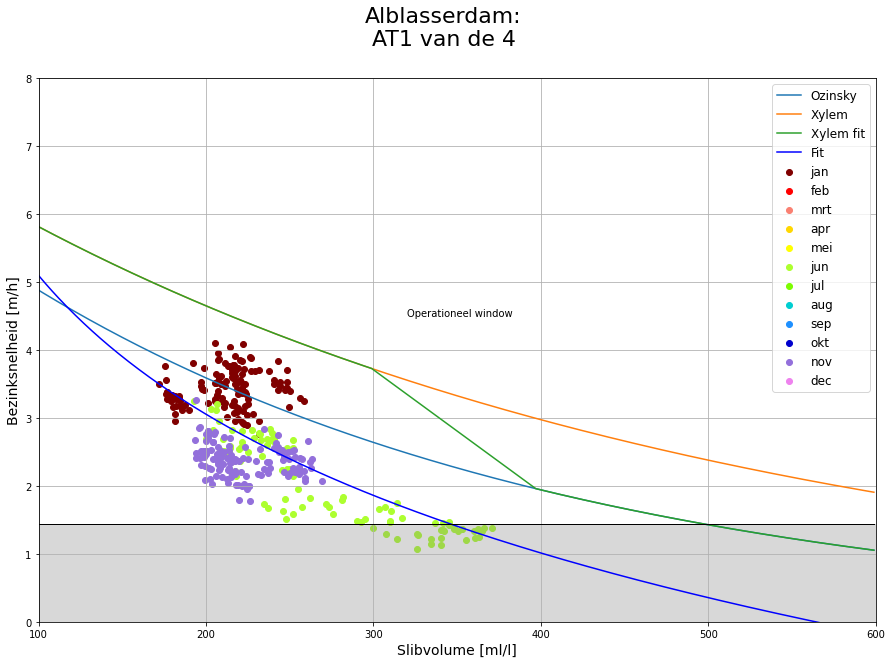

In [69]:
import matplotlib.pyplot as plt
colors = {1:'maroon', 2:'red', 3: 'salmon', 4:'gold', 5:'yellow', 6:'greenyellow', 7:'lawngreen', 8: 'darkturquoise', 9: 'dodgerblue', 10: 'mediumblue',11: 'mediumpurple', 12: 'violet'}
legend = {1:"jan",2:"feb",3:"mrt",4:"apr",5:"mei",6:"jun",7:"jul",8:"aug",9:"sep",10:"okt",11:"nov",12:"dec"}
df_resultsa = df_resultsa.assign(Month = df_resultsa.index.month)

fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle("Alblasserdam:\nAT1 van de 4",fontsize=22)
ax.set_xlim(100,600)
ax.set_ylim(0,8)
ax.set_xlabel("Slibvolume [ml/l]", fontsize=14)
ax.set_ylabel("Bezinksnelheid [m/h]", fontsize=14)
for i in range(12):
    ax.scatter(x=df_resultsa[df_resultsa["Month"]==i+1]["Slibvolume"], y=df_resultsa[df_resultsa["Month"]==i+1]['Totale snelheid'], color=colors[i+1], label = legend[i+1])

ax.plot(t, ozinsky(t, 120), label="Ozinsky")
ax.plot(t, xylem(t, 120), label="Xylem") 
ax.plot(t, xylem_fit(t, 120), label="Xylem fit")
ax.plot(t, p(np.log(t)), "b-", label = "Fit")
ax.plot(t, min_snelheid(t), color="black", linewidth=1)

plt.axhspan(0,1.44, color="grey", alpha=0.3)
plt.text(320,4.5,"Operationeel window")

plt.legend(fontsize="12")
plt.grid(which='major', axis='both')
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\12 jan 2021\Resultaten_1_gl\AT1_Slibvolume_Bezinksnelhei_jan_jun_nov_2020")

In [71]:
at1 = "mediumpurple"
dwa = "red"
rwa = "dodgerblue"

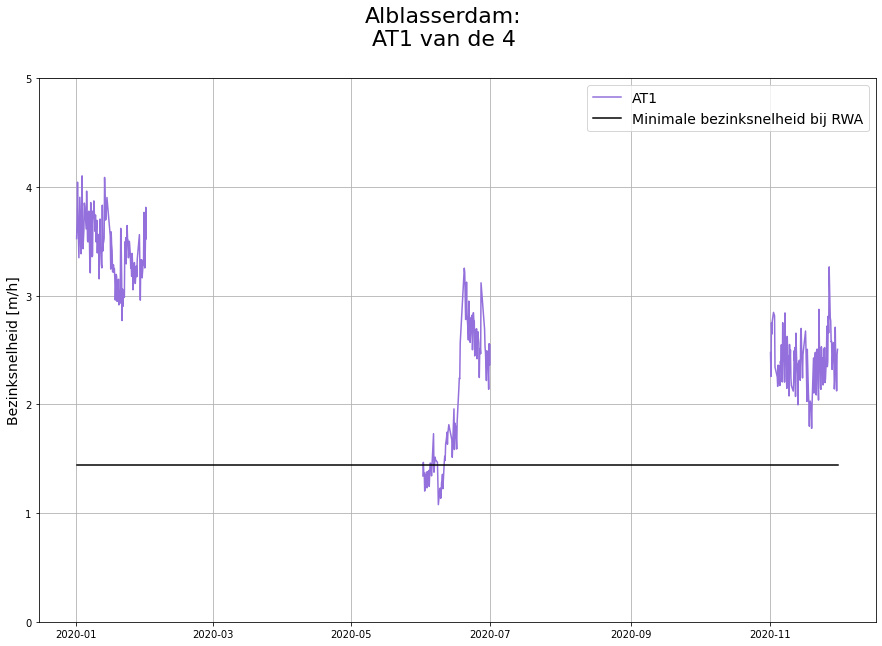

In [78]:
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle("Alblasserdam:\nAT1 van de 4",fontsize=22)
ax.set_ylabel("Bezinksnelheid [m/h]", fontsize=14)
plt.grid(which='major', axis='both')
plt.plot(df_resultsa.loc["2019-12-31":"2020-02-01"].index, df_resultsa.loc["2019-12-31":"2020-02-01" ,"Totale snelheid"], color=at1, label="AT1")
plt.plot(df_resultsa.loc["2020-05-31":"2020-07-01"].index, df_resultsa.loc["2020-05-31":"2020-07-01" ,"Totale snelheid"], color=at1)
plt.plot(df_resultsa.loc["2020-10-31":"2020-12-01"].index, df_resultsa.loc["2020-10-31":"2020-12-01" ,"Totale snelheid"], color=at1)
ax.plot(df_resultsa.index, min_snelheid(df_resultsa.index), label="Minimale bezinksnelheid bij RWA", color="black")
plt.legend(fontsize=14)
ax.set_ylim(0,5)
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\12 jan 2021\Resultaten_1_gl\AT1_Bezinksnelheid_jan_jun_nov_2020")